In [2]:
#Random forest

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
file_path = "glass.xlsx"
df = pd.read_excel(file_path, sheet_name="glass")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
df.shape

(214, 10)

In [5]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [6]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [8]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [15]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [16]:
df.duplicated().sum()

np.int64(1)

In [ ]:
#Data Visualization

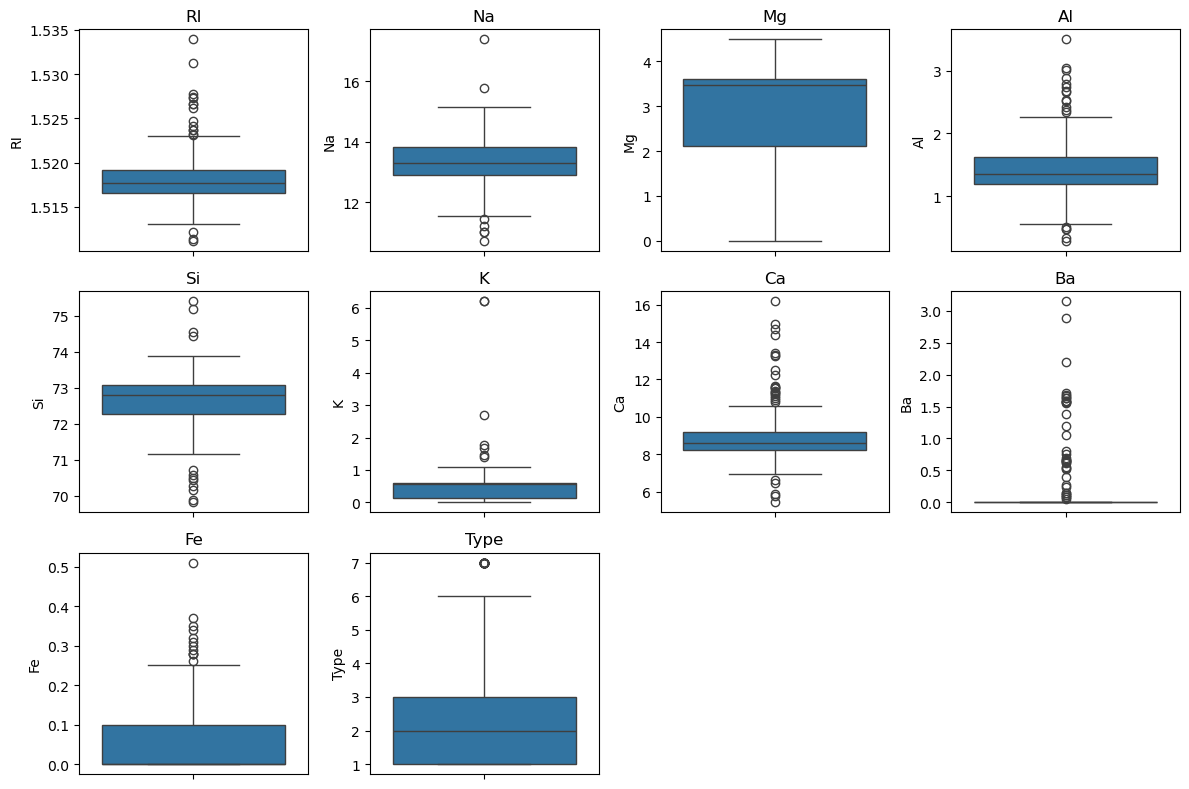

In [19]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


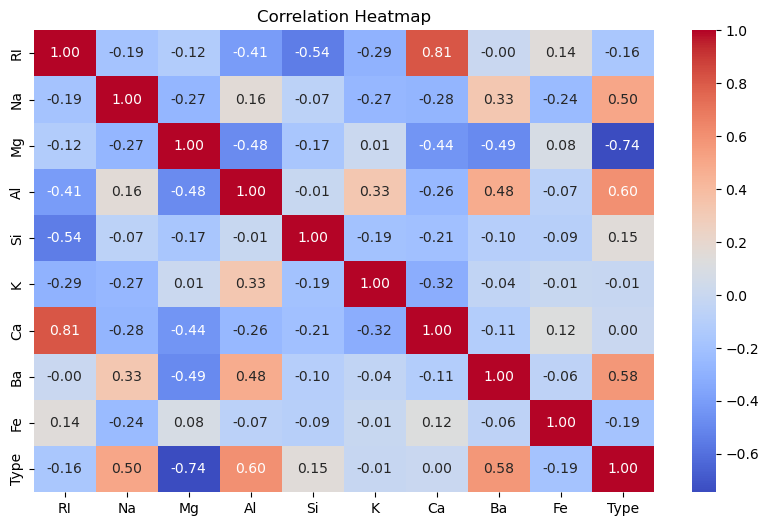

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

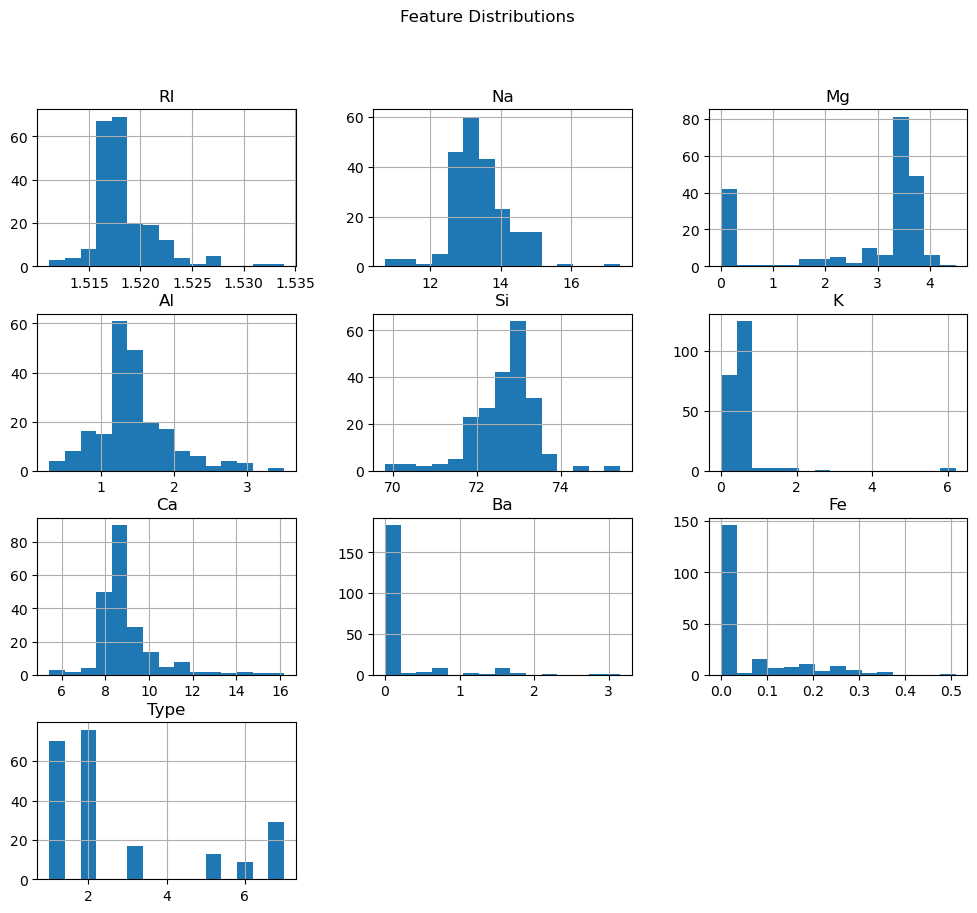

In [21]:
df.hist(figsize=(12, 10), bins=15)
plt.suptitle("Feature Distributions")
plt.show()

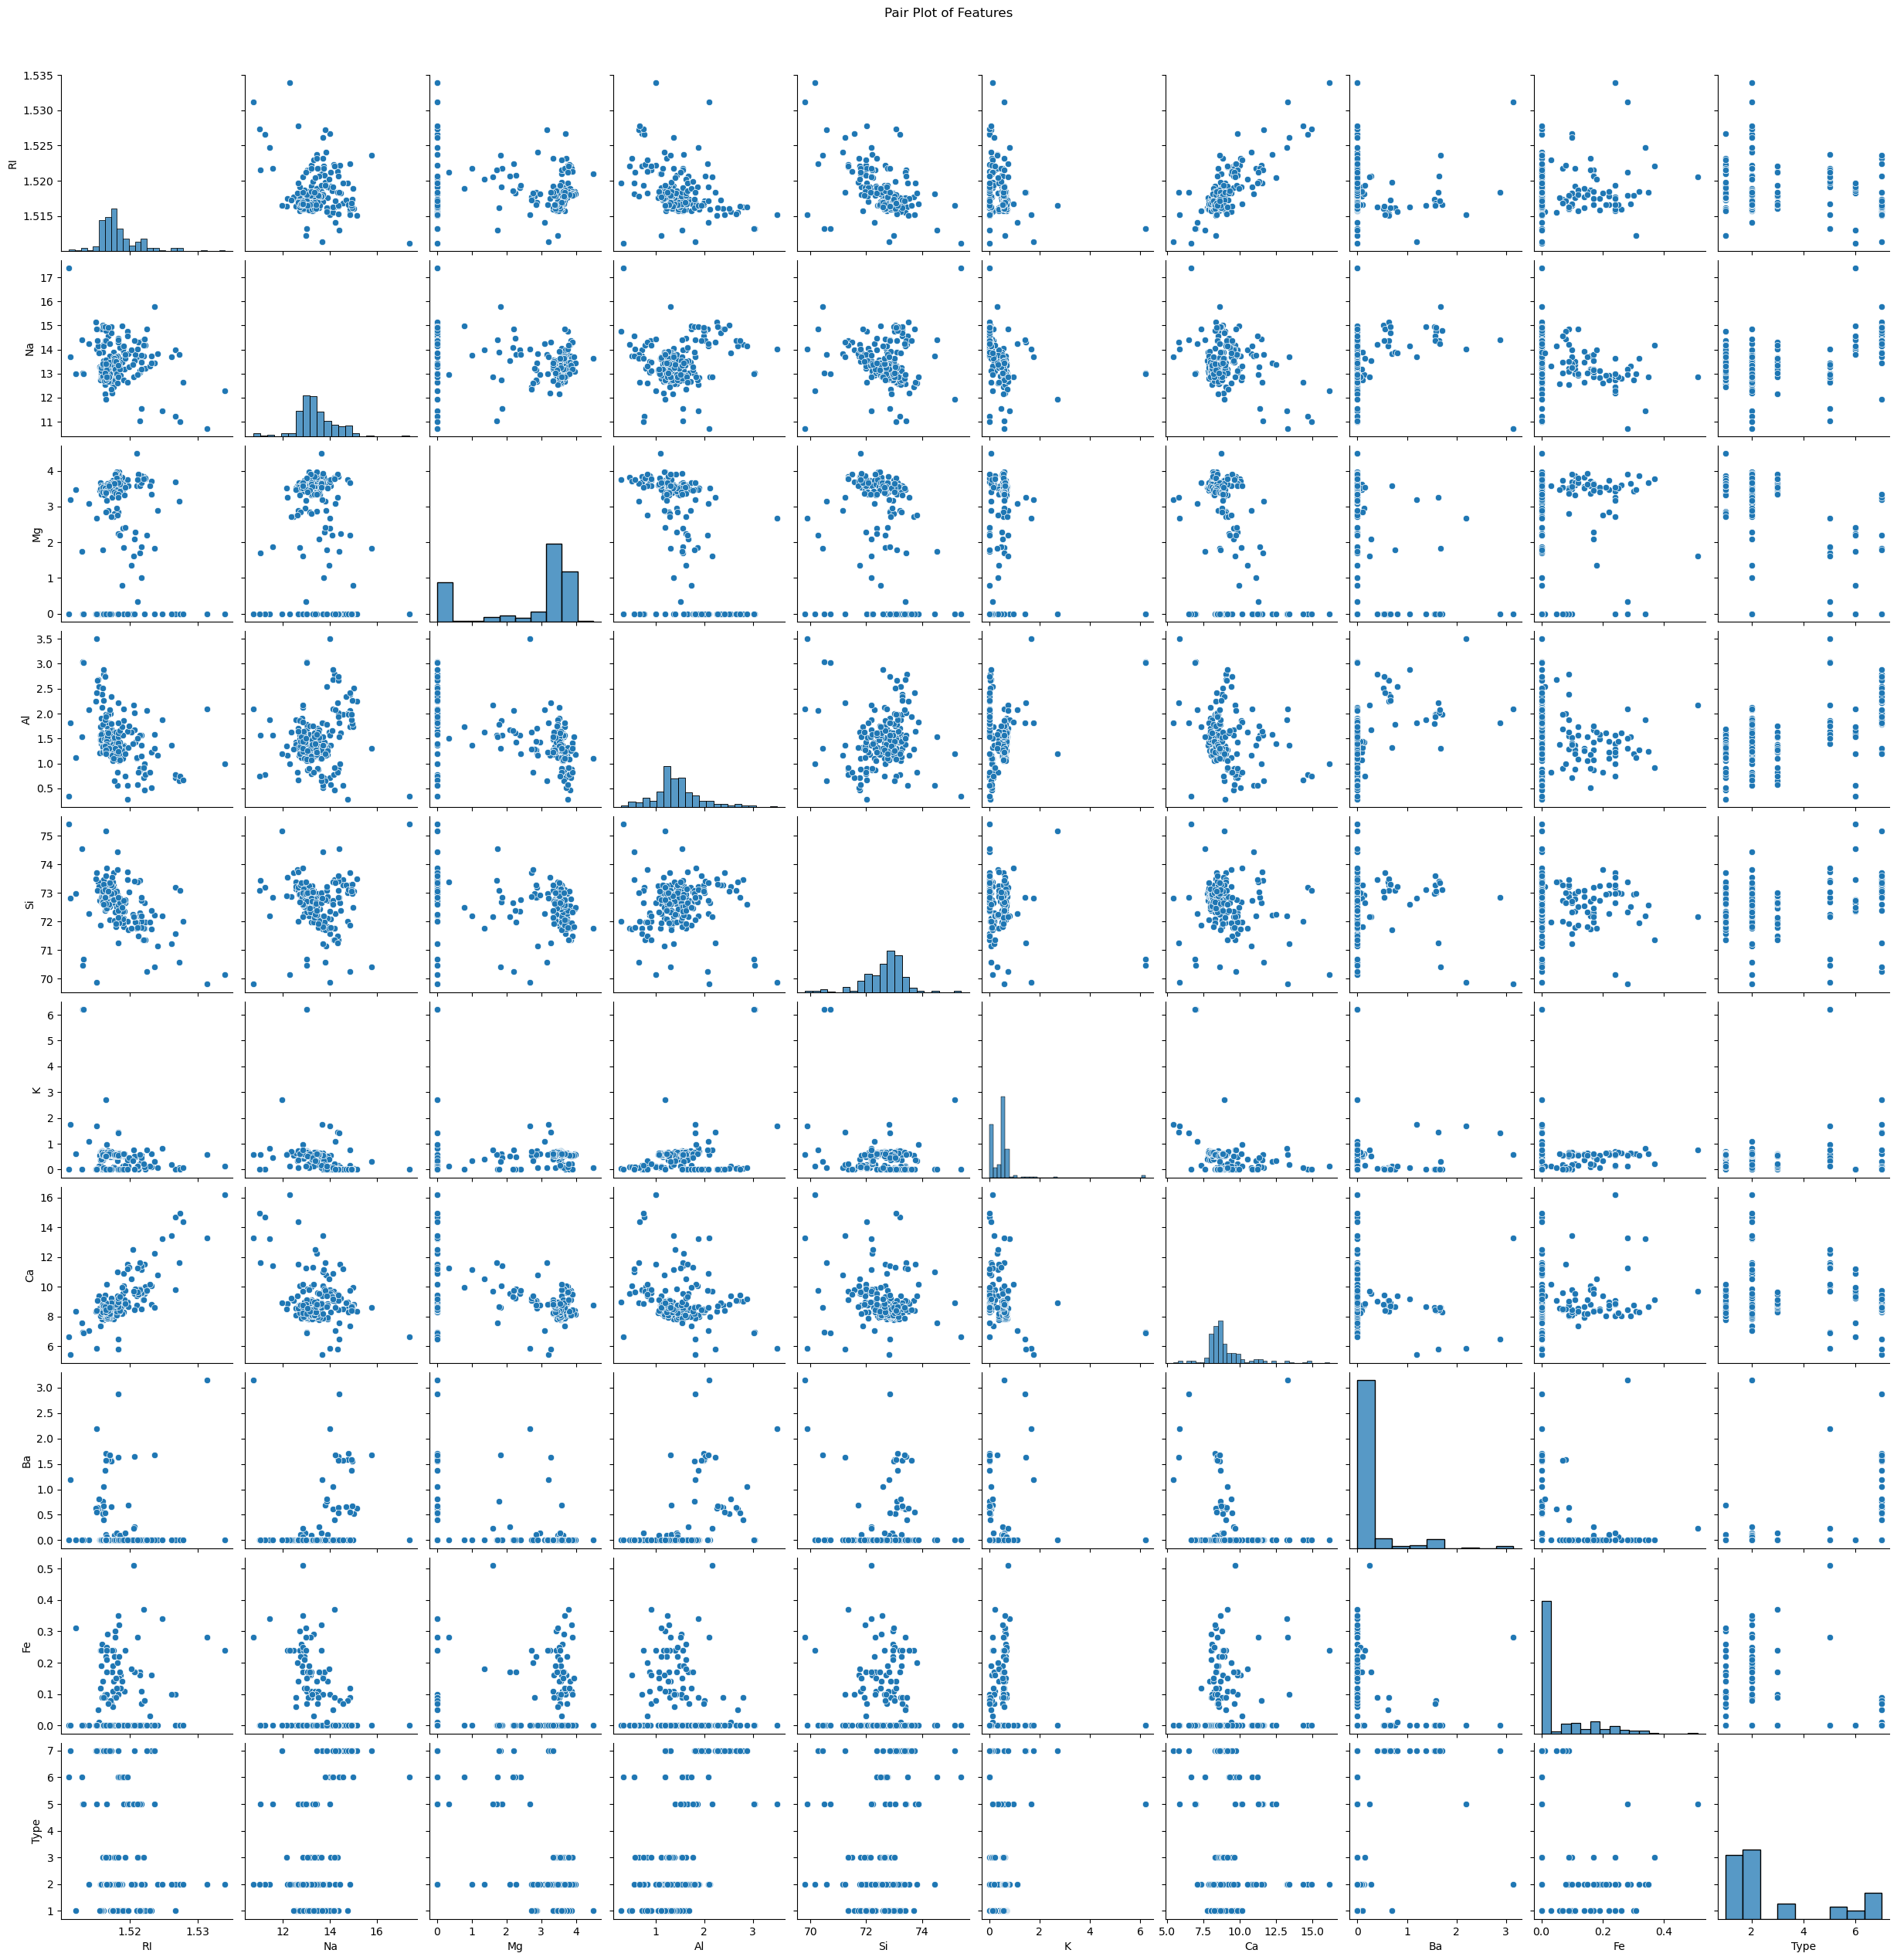

In [23]:
sns.pairplot(df, diag_kind='hist')
plt.suptitle("Pair Plot of Features", y=1.02)
plt.show()

In [24]:
#Data preprocessing

In [25]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [53]:
if df.isnull().sum().any():
    num_cols = df.select_dtypes(include=[np.number]).columns
    cat_cols = df.select_dtypes(exclude=[np.number]).columns
    df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

In [54]:
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

cat_cols = df.select_dtypes(exclude=[np.number]).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\n✅ Missing values handled using mean (numeric) and mode (categorical).")


✅ Missing values handled using mean (numeric) and mode (categorical).


In [58]:
cat_cols = df.select_dtypes(exclude=[np.number]).columns
print("Categorical columns to encode:", list(cat_cols))
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)  
df_encoded.shape

Categorical columns to encode: []


(214, 10)

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
X = df_encoded.drop('Type', axis=1)  # Replace 'Type' with your target column
y = df_encoded['Type']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['Type'] = y
max_count = df_scaled['Type'].value_counts().max()
df_balanced = pd.DataFrame()
for cls in df_scaled['Type'].unique():
    cls_data = df_scaled[df_scaled['Type'] == cls]
    cls_upsampled = resample(cls_data, 
                             replace=True,     
                             n_samples=max_count,
                             random_state=42)
    df_balanced = pd.concat([df_balanced, cls_upsampled])
    X_final = df_balanced.drop('Type', axis=1).values
y_final = df_balanced['Type'].values
pd.Series(y_final).value_counts()

1    76
2    76
3    76
5    76
6    76
7    76
Name: count, dtype: int64

In [67]:
#Random Forest Model Implementation

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42, stratify=y_final
)
X_train.shape[0]

364

In [71]:
X_test.shape[0]

92

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy on test set:", round(accuracy, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy on test set: 0.9674

Classification Report:
               precision    recall  f1-score   support

           1       0.88      0.93      0.90        15
           2       1.00      0.87      0.93        15
           3       0.94      1.00      0.97        15
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        15

    accuracy                           0.97        92
   macro avg       0.97      0.97      0.97        92
weighted avg       0.97      0.97      0.97        92

Confusion Matrix:
 [[14  0  1  0  0  0]
 [ 2 13  0  0  0  0]
 [ 0  0 15  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0 16  0]
 [ 0  0  0  0  0 15]]


In [76]:
from sklearn.metrics import precision_score,recall_score,f1_score, classification_report, confusion_matrix
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\n--- Model Evaluation Metrics ---")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")

# Optional: Detailed report and confusion matrix
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



--- Model Evaluation Metrics ---
Accuracy : 0.9674
Precision: 0.9694
Recall   : 0.9674
F1-score : 0.9673

Classification Report:
               precision    recall  f1-score   support

           1       0.88      0.93      0.90        15
           2       1.00      0.87      0.93        15
           3       0.94      1.00      0.97        15
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        15

    accuracy                           0.97        92
   macro avg       0.97      0.97      0.97        92
weighted avg       0.97      0.97      0.97        92

Confusion Matrix:
 [[14  0  1  0  0  0]
 [ 2 13  0  0  0  0]
 [ 0  0 15  0  0  0]
 [ 0  0  0 16  0  0]
 [ 0  0  0  0 16  0]
 [ 0  0  0  0  0 15]]


In [ ]:
#Bagging and Boosting

In [79]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
bagging_model = RandomForestClassifier(n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)
print("Bagging Accuracy:", round(accuracy_score(y_test, y_pred_bagging), 4))
boosting_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
boosting_model.fit(X_train, y_train)
y_pred_boosting = boosting_model.predict(X_test)
print("Boosting Accuracy:", round(accuracy_score(y_test, y_pred_boosting), 4))


Bagging Accuracy: 0.9674
Boosting Accuracy: 0.9783


In [80]:
#Additional Notes

In [81]:
#Bagging:
#Bagging creates multiple independent models using different random samples of the dataset.
#Randomly sample subsets of the training data with replacement.
#Train a model on each subset.
#Combine predictions

#Boosting:
#Boosting builds models sequentially, where each new model focuses on the mistakes of the previous models.
#Train a weak learner.
#Adjust the weights of misclassified samples to focus on harder cases.
#Repeat multiple iterations.
#Combine all models for the final prediction.

In [ ]:
#Imbalanced Data
#Imbalanced data occurs when the classes in your target variable are not equally represented.

#Ways to Handle it:
#Oversampling (Upsampling)
#Increase the number of samples in the minority class by replicating or generating synthetic samples.